# HW3,Q5 Ghazaleh Zehtab

In [839]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plot_utils
import seaborn as sns
import sklearn
from IPython.core.display import Image
from sklearn import tree, metrics
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [840]:
from sklearn.model_selection import train_test_split
th=pd.read_csv("thyroid.csv")
th.head(20)

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.0,10.1,2.2,0.9,2.7,1.0
1,NaN,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,NaN,0.6,1.0
3,109.0,NaN,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,NaN,-0.1,1.0
5,105.0,6.1,2.1,1.4,7.0,1.0
6,110.0,NaN,1.6,1.6,2.7,1.0
7,114.0,NaN,2.4,1.5,5.7,1.0
8,106.0,?,2.2,1.5,NaN,1.0
9,107.0,13.0,1.1,0.9,3.1,1.0


In [841]:
th.replace('?',np.nan,inplace=True)
th['Serum_thyroxin']=pd.to_numeric(th['Serum_thyroxin'])
th['Serum_triiodothyronine']=pd.to_numeric(th['Serum_triiodothyronine'])
th['Basal_TSH']=pd.to_numeric(th['Basal_TSH'])
th.head(20)

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.0,10.1,2.2,0.9,2.7,1.0
1,NaN,9.9,3.1,2.0,5.9,1.0
2,127.0,12.9,2.4,NaN,0.6,1.0
3,109.0,NaN,1.6,1.4,1.5,1.0
4,105.0,7.3,1.5,NaN,-0.1,1.0
5,105.0,6.1,2.1,1.4,7.0,1.0
6,110.0,NaN,1.6,1.6,2.7,1.0
7,114.0,NaN,2.4,1.5,5.7,1.0
8,106.0,NaN,2.2,1.5,NaN,1.0
9,107.0,13.0,1.1,0.9,3.1,1.0


## Q5.a

In [842]:
th['Outcome'].fillna(1,inplace=True)
th.fillna(th.mean(),inplace=True)
th.isna().sum()

T3_resin                  0
Serum_thyroxin            0
Serum_triiodothyronine    0
Basal_TSH                 0
Abs_diff_TSH              0
Outcome                   0
dtype: int64

In [843]:
th

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
0,107.000000,10.100000,2.2,0.900000,2.7,1.0
1,107.761628,9.900000,3.1,2.000000,5.9,1.0
2,127.000000,12.900000,2.4,1.274269,0.6,1.0
3,109.000000,10.870115,1.6,1.400000,1.5,1.0
4,105.000000,7.300000,1.5,1.274269,-0.1,1.0
...,...,...,...,...,...,...
180,88.000000,16.500000,4.9,0.800000,0.1,2.0
181,97.000000,15.100000,1.8,1.200000,-0.2,2.0
182,106.000000,13.400000,3.0,1.100000,0.0,1.0
183,79.000000,19.000000,5.5,1.274269,0.3,2.0


## Q5.b

In [844]:
th.corr()

,T3_resin,Serum_thyroxin,Serum_triiodothyronine,Basal_TSH,Abs_diff_TSH,Outcome
T3_resin,1.000000,-0.224923,-0.150091,0.103323,0.204132,-0.232447
Serum_thyroxin,-0.224923,1.000000,0.617121,-0.179007,-0.407017,0.765619
Serum_triiodothyronine,-0.150091,0.617121,1.000000,-0.166763,-0.298197,0.565040
Basal_TSH,0.103323,-0.179007,-0.166763,1.000000,0.176113,-0.196609
Abs_diff_TSH,0.204132,-0.407017,-0.298197,0.176113,1.000000,-0.412027
Outcome,-0.232447,0.765619,0.565040,-0.196609,-0.412027,1.000000


<AxesSubplot:>

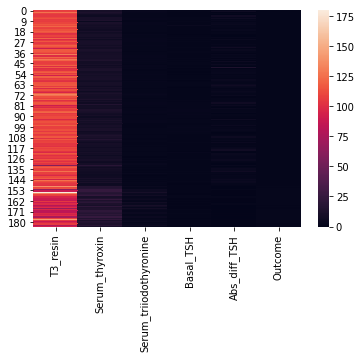

In [845]:
sns.heatmap(th)

## Q5.c

c:\_uni\term8\datamining\hws\codes\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

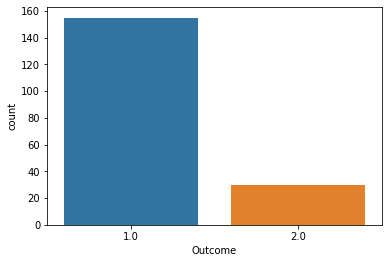

In [846]:
sns.countplot(th['Outcome'])

<AxesSubplot:title={'center':'count (Outcome)'}>

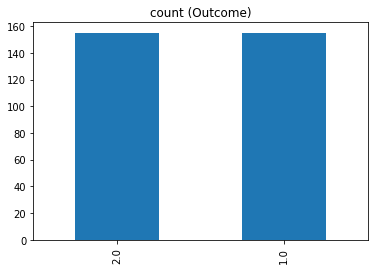

In [847]:
class_count_1, class_count_2 = th['Outcome'].value_counts()
#seprate 2 classes of Outcome
class_1 = th[th['Outcome'] == 1]
class_2 = th[th['Outcome'] == 2]# print the shape of the class
#print('class 1:', class_1.shape)
#print('class 2:', class_2.shape)
class_2_over = class_2.sample(class_count_1, replace=True)
test_over = pd.concat([class_2_over, class_1], axis=0)
#print("total Outcome of 1 and 2:",test_over['Outcome'].value_counts())# plot the count after under-sampeling
test_over['Outcome'].value_counts().plot(kind='bar', title='count (Outcome)')

## Q5.d

In [848]:

x = test_over.iloc[:,:-1]
y = test_over.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Q5.e

[Text(310.0, 475.65000000000003, 'X[1] <= 11.95\ngini = 0.5\nsamples = 248\nvalue = [125, 123]'),
 Text(186.0, 339.75, 'X[0] <= 96.0\ngini = 0.083\nsamples = 115\nvalue = [110, 5]'),
 Text(124.0, 203.85000000000002, 'X[1] <= 10.985\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(62.0, 67.94999999999999, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(186.0, 67.94999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(248.0, 203.85000000000002, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(434.0, 339.75, 'X[2] <= 1.55\ngini = 0.2\nsamples = 133\nvalue = [15, 118]'),
 Text(372.0, 203.85000000000002, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(496.0, 203.85000000000002, 'gini = 0.119\nsamples = 126\nvalue = [8, 118]')]

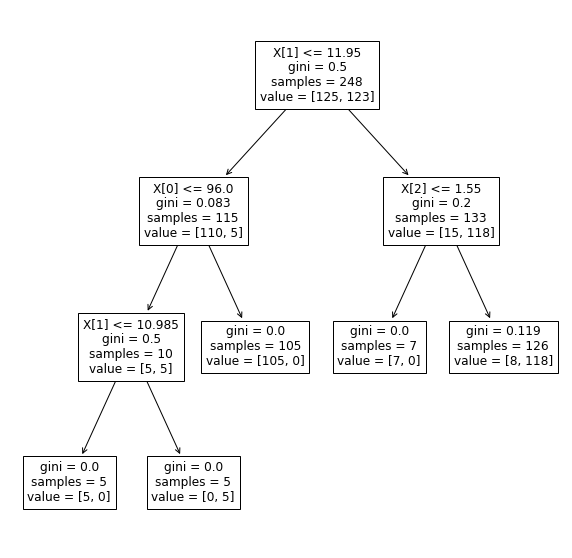

In [849]:
DT = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5,max_depth=8).fit(X_train,y_train)
fig, axs = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT, ax=axs)

## Q5.f

[Text(248.0, 475.65000000000003, 'X[1] <= 13.3\ngini = 0.499\nsamples = 62\nvalue = [30, 32]'),
 Text(124.0, 339.75, 'X[2] <= 2.55\ngini = 0.121\nsamples = 31\nvalue = [29, 2]'),
 Text(62.0, 203.85000000000002, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(186.0, 203.85000000000002, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(372.0, 339.75, 'X[0] <= 110.5\ngini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(310.0, 203.85000000000002, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(434.0, 203.85000000000002, 'X[1] <= 16.2\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(372.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(496.0, 67.94999999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

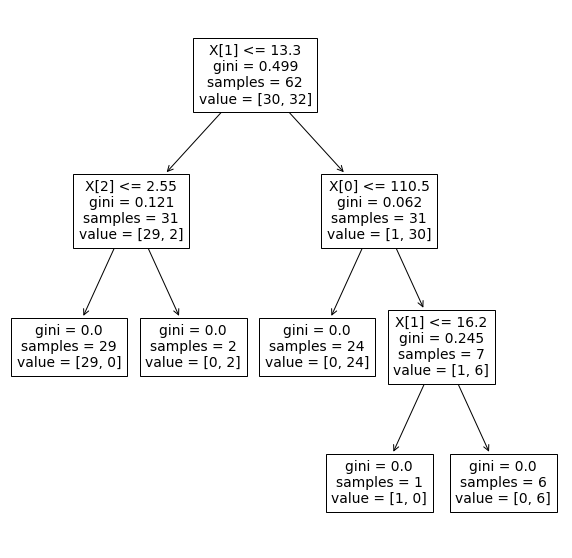

In [850]:
DT_test = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5,max_depth=8).fit(X_test,y_test)
fig1,axs1 = plt.subplots(1, 1, figsize=(10,10))
tree.plot_tree(DT_test, ax=axs1)

In [851]:
y_pred = DT.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.967741935483871

## Q5.h

Feature: 0, Score: 0.10994
Feature: 1, Score: 0.76521
Feature: 2, Score: 0.09382
Feature: 3, Score: 0.01598
Feature: 4, Score: 0.01505


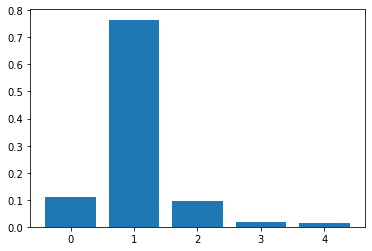

In [852]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression, load_iris
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Q5.i

In [853]:
DTC = tree.DecisionTreeClassifier()
iris = load_iris()
DTC = DTC.fit(iris.data, iris.target)
goal=tree.export_graphviz(DTC, out_file=None,
                                    feature_names=iris.feature_names,  
                                    class_names=iris.target_names,  
                                    filled=True, rounded=True,  
                                    special_characters=True )

## Q5.j

In [854]:
import pydotplus
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
graph = pydotplus.graph_from_dot_data(goal)
graph.write_png("./tree_iris.png")

True